### Importing Libraries and IBMQ Account

In [2]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_14988\104988094.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-04-29 00:49:39,512: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### Defining balanced and constant function Black Boxes

In [37]:
def balanced(n):
    c = QuantumCircuit(n+1,n)
    c.x(n)
    c.barrier()    
    for i in range(n+1):
        c.h(i)
    c.barrier()
    for i in range(n):
        c.cx(i,n)
    c.barrier()
    for i in range(n):
        c.h(i)
    for i in range(n):
        c.measure(i,i)        
    return c

In [38]:
def constant(n):
    c = QuantumCircuit(n+1,n)
    c.x(n)
    c.barrier()    
    for i in range(n+1):
        c.h(i)
    c.barrier()
 
    c.barrier()
    for i in range(n):
        c.h(i)
    for i in range(n):
        c.measure(i,i)        
    return c

#### Creating our Quantum Circuits with Hadamard Sandwich for Balanced and Constant respectively

In [43]:
cb = balanced(1)
cb.draw()

░ ┌───┐ ░       ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░───■───░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘ ░       ║ 
c: 1/══════════════════════════════╩═
                                   0

In [44]:
cc = constant(1)
cc.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──░───────╫─
     └───┘ ░ └───┘ ░  ░       ║ 
c: 1/═════════════════════════╩═
                              0

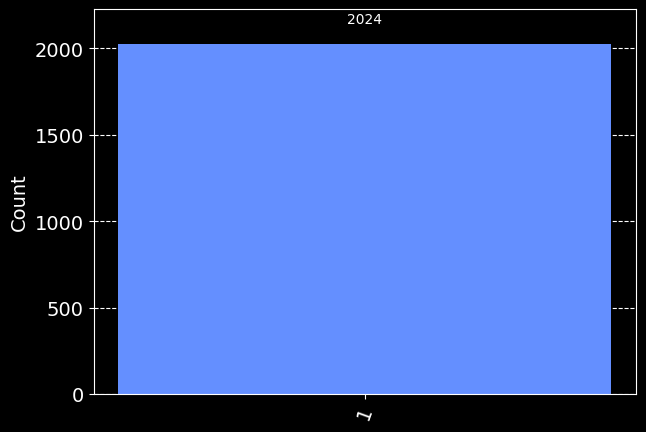

In [45]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(cb, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts)

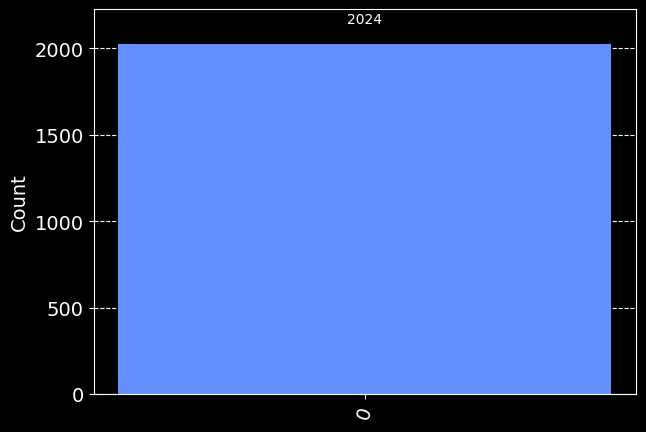

In [46]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(cc, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts)

In [6]:
circuit = QuantumCircuit(3,2)
circuit.i(0) ; circuit.i(1) ; circuit.x(2) ; 
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.barrier()
circuit.cx(1,2)
circuit.barrier()
circuit.h(0) ; circuit.h(1) ; circuit.h(2)
circuit.measure(0,0) ; circuit.measure(1,1)
circuit.draw()

┌───┐┌───┐ ░       ░ ┌───┐┌─┐   
q_0: ┤ I ├┤ H ├─░───────░─┤ H ├┤M├───
     ├───┤├───┤ ░       ░ ├───┤└╥┘┌─┐
q_1: ┤ I ├┤ H ├─░───■───░─┤ H ├─╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐ ░ ├───┤ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫──╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1

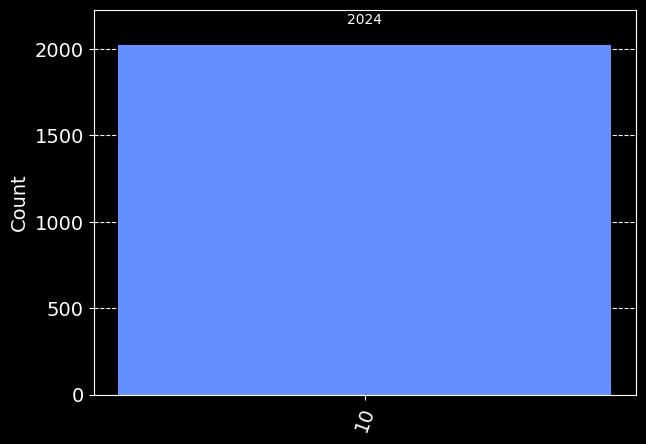

In [7]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [22]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


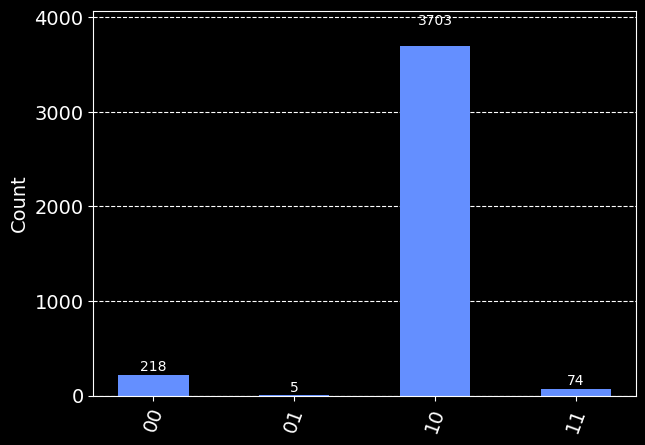

In [23]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)